# Excercise 10: MFKZIZ004

Grid points (IM): 101
Time steps (NT): 44
Time step dt = 200 s
dx/dt = 1.0 m/s
Physical speed c = 0.5 m/s
Courant number = 0.5


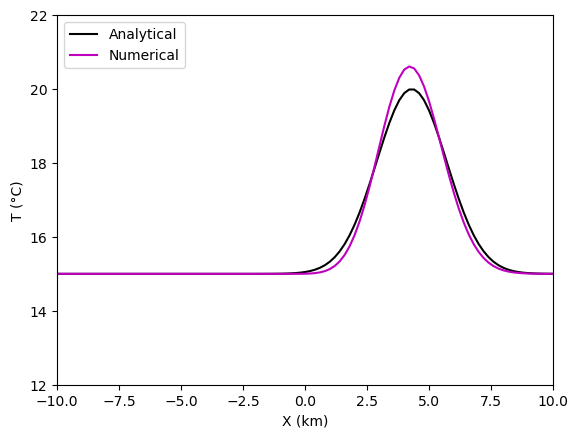

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
# Note: This code was taken from  advection_analytical.py and modified so that it can work as a phython code. 
# Given parameters
c = 0.5         # Advection speed [m/s]
dx = 200         # Spatial resolution [m]
dt = 200         # Time step [s]
t0 = 0.          # Initial time
tmax = 0.1       # Total simulation time [days]
xmax = 10e3      # Half-length of the domain [m]

# Initial condition parameters
T0 = 15.         # Baseline temperature [°C]
sigma = 2000.    # Gaussian width [m]
A = 5.           # Amplitude [°C]

# Grid setup

# Time axis (convert days to seconds)
NT = int(np.floor(tmax * 86400 / dt)) + 1  # number of time steps
time = np.linspace(t0, tmax * 86400, NT)

# Spatial axis (centered around 0)
x = np.arange(-xmax, xmax + dx, dx)
IM = len(x)

# Solution array
T = np.zeros((IM, NT))


# Initial conditions
def Gaussian(x):
    return T0 + A * np.exp(-(x / sigma) ** 2)

T[:, 0] = Gaussian(x)

# Print grid info
print('Grid points (IM):', IM)
print('Time steps (NT):', NT)
print('Time step dt =', dt, 's')
print('dx/dt =', dx / dt, 'm/s')
print('Physical speed c =', c, 'm/s')
print('Courant number =', c * dt / dx)


# Numerical solution (Lax scheme)
for n in range(NT - 1):
    # Boundary conditions
    T[0, n + 1] = T0
    T[-1, n + 1] = T0
    
    # Central difference in space (Lax scheme)
    rhs = -c * (T[2:, n] - T[:-2, n]) / (2 * dx)
    T[1:-1, n + 1] = T[1:-1, n] + rhs * dt


# Plot and Animate
fig, ax = plt.subplots()
ax.set_xlim(-xmax / 1000, xmax / 1000)
ax.set_ylim(T0 - 3, T0 + 7)
ax.set_xlabel("X (km)")
ax.set_ylabel("T (°C)")
line, = ax.plot(x / 1000., Gaussian(x), 'k-', label="Analytical")
sol, = ax.plot(x / 1000., T[:, 0], 'm-', label="Numerical")
ax.legend(loc='upper left')

def animate(i):
    t = t0 + i * dt
    line.set_ydata(Gaussian(x - c * t))  # analytical
    sol.set_ydata(T[:, i])              # numerical
    return line, sol,

ani = animation.FuncAnimation(
    fig, animate, frames=NT, interval=dt * 1000 / 10, blit=True, repeat=True)


# Display animation 
HTML(ani.to_jshtml())


#### (1) What happens when: you change the values of dx and c

- I have made use of the above code to make changes to dx (chnage in space) and c (assess the changes in speed). When I changed that dx from 200 to 400 m, and then again from 400 to 600 m I saw that the numerical solution line which is represented by the pink line deviates from the analytical solution. The line is no longer smoother, it gets rough at the bump. This shows that the accuracy keeps on decreasing as you increase dx, thus I would suggest to keep the dx smaller so that the accuracy is enhanced and the numerical solution with be very close to the analytical solution.
- When I increased the speed from 0.5 to 1.5 m/s, and then again from 1.5 to 2 m/s, I saw that the numerical solution moved way quciker than the analytical solution and this made this solution unstable. Speed (c) should be kept at a low number.

#### (2) What happens when: you increase or decrease the parameter σ

- When I changed  σ from 2000 to 1000 m, the wideness of the waves decreased and for the numerical solution, there were more oscilations and this made it deviate from the analytical solution.
- When I changed σ from 2000 to 5000 m, the waves of the solutions get wider and they follow a more similar trend. However, over time it seems that the numerical solution starts to deviate from the analytical solution and thus this will reduce the accuracy. 